In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('NSE-Tata-Global-Beverages-Limited.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [3]:
df.size

9880

In [4]:
df.shape

(1235, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [6]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [7]:
df.corr()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.998956,0.998776,0.997662,0.997704,0.367503,0.587026
High,0.998956,1.000000,0.998728,0.999130,0.999159,0.388798,0.605907
Low,0.998776,0.998728,1.000000,0.999008,0.999065,0.361695,0.582446
Last,0.997662,0.999130,0.999008,1.000000,0.999963,0.381269,0.599575
Close,0.997704,0.999159,0.999065,0.999963,1.000000,0.380801,0.599155
Total Trade Quantity,0.367503,0.388798,0.361695,0.381269,0.380801,1.000000,0.941976
Turnover (Lacs),0.587026,0.605907,0.582446,0.599575,0.599155,0.941976,1.000000


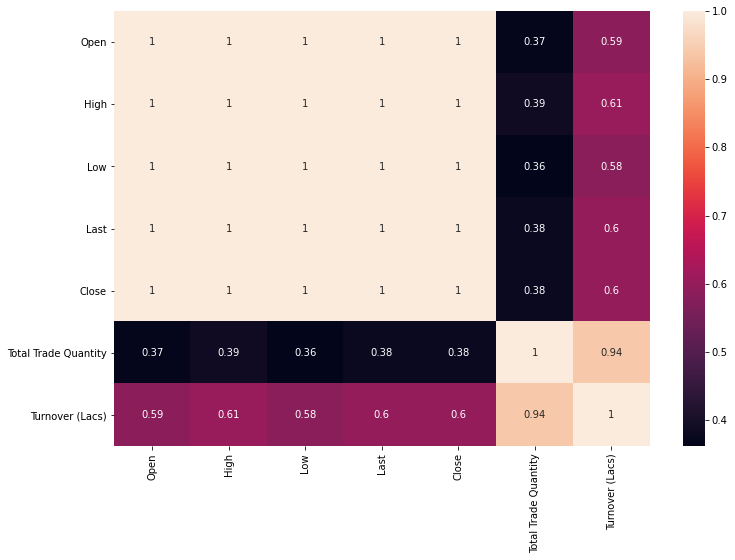

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True);

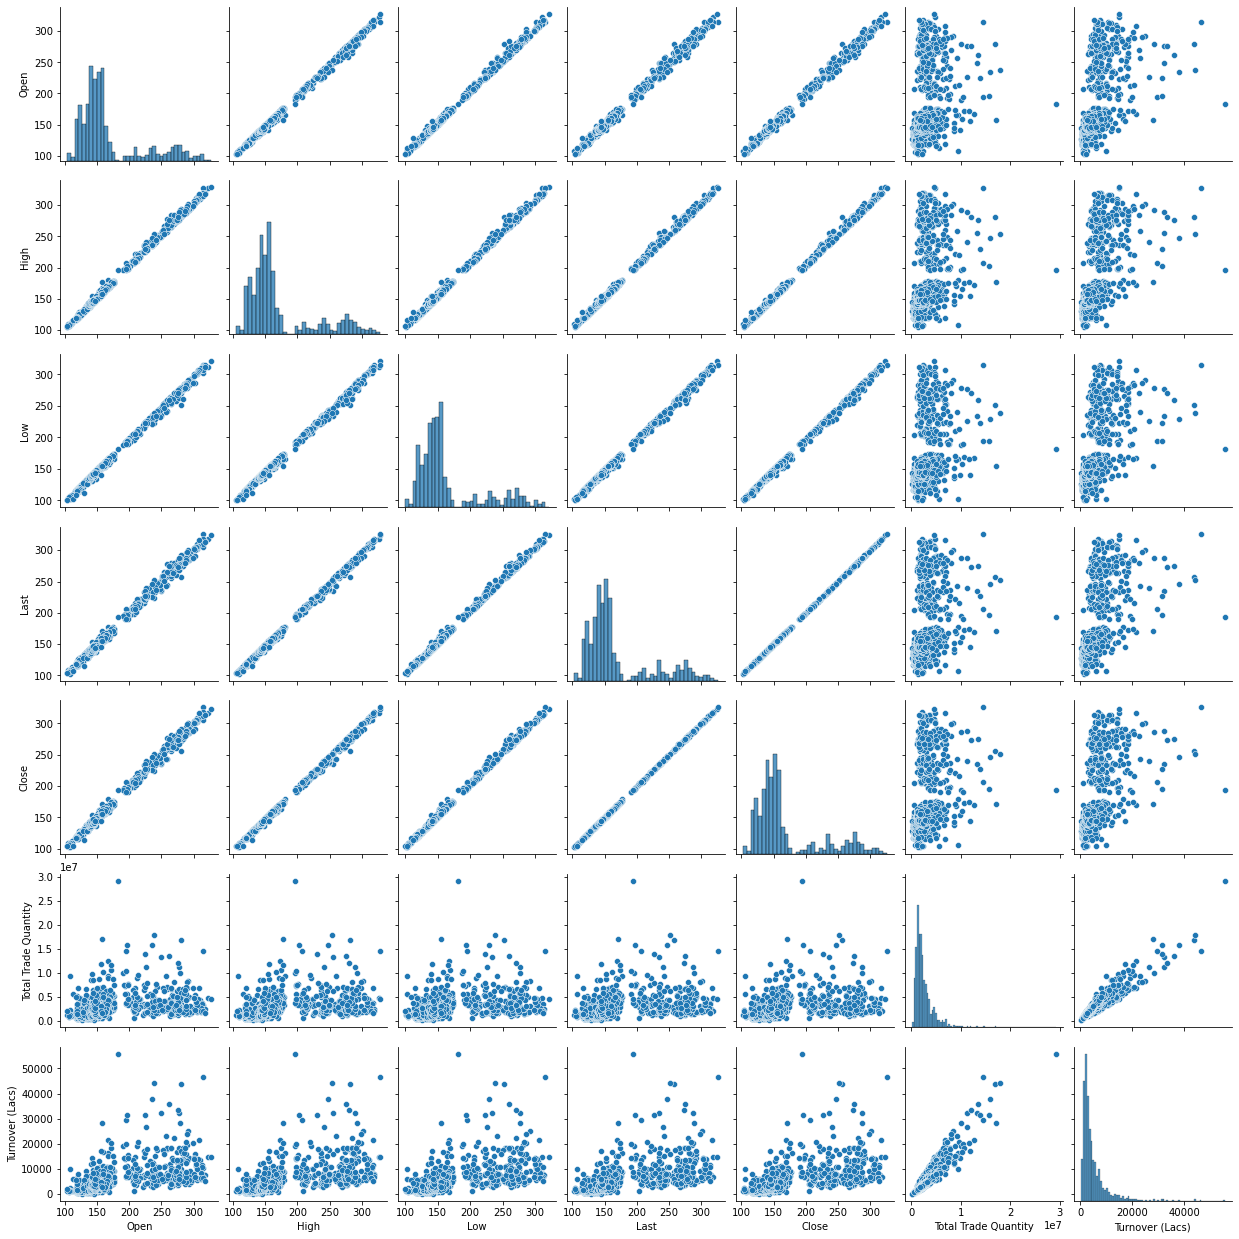

In [9]:
sns.pairplot(df);

In [10]:
df.drop(['Date'],inplace=True,axis=1)

In [11]:
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


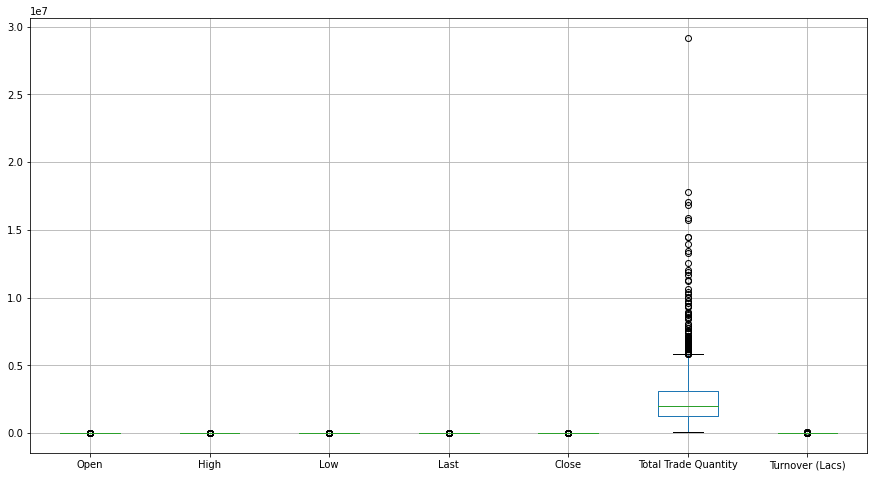

In [12]:
plt.figure(figsize=(15,8))
df.boxplot();

In [13]:
for cols in df.columns[:-1]:
    Q1 = df[cols].quantile(q=0.25)
    Q3 = df[cols].quantile(q=0.75)
    iqr=Q3-Q1
    
    low = Q1-1.5*(Q3-Q1)
    high = Q3+1.5*(Q3-Q1)
    df.loc[(df[cols]<low) | (df[cols]>high),cols] = df[cols].median()

<AxesSubplot:>

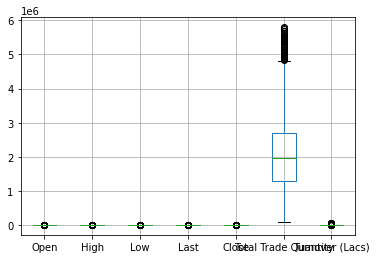

In [14]:
df.boxplot()

In [15]:
X=df.drop('Close',axis=1)
y=df['Close']

In [16]:
from sklearn.preprocessing import StandardScaler
# define StandScaler scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
Reg_predict=reg.predict(X_test)

In [18]:
reg.score(X_train, y_train)

0.9996401183341754

In [19]:
reg.score(X_test, y_test)

0.9996888715677903

# Simple Regression

In [20]:
X=df['Open'].values.reshape(-1,1)

In [21]:
y=df['Close'].values

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
reg1 = LinearRegression()

In [23]:
reg1.fit(X_train,y_train)

LinearRegression()

In [24]:
y_train_pred= reg1.predict(X_train)
y_test_pred=reg1.predict(X_test)

In [25]:
reg1.score(X_train,y_train)

0.9491336849391435

In [26]:
reg1.score(X_test,y_test)

0.9345318949118717

C:\Users\Rushikesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


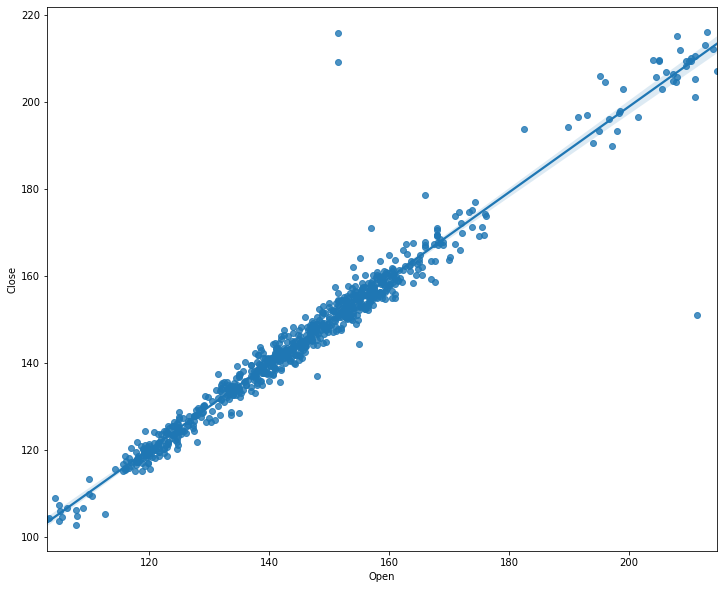

In [27]:
#To draw best fit line on train data
plt.figure(figsize=(12,10));
sns.regplot(X_train,y_train);
plt.xlabel('Open')
plt.ylabel("Close");

In [28]:
import numpy as np
reg1.predict(np.array([210]).reshape(1,-1))

array([208.88971089])

In [29]:
# R2 And MSE
from sklearn import metrics
print("R score",metrics.r2_score(y_train,y_train_pred))
print("MSE = ", metrics.mean_squared_error(y_train,y_train_pred))

R score 0.9491336849391435
MSE =  16.690336009425096


In [30]:
from sklearn import metrics
print("R score",metrics.r2_score(y_test,y_test_pred))
print("MSE = ", metrics.mean_squared_error(y_test,Reg_predict))

R score 0.9345318949118717
MSE =  0.10589587488058337


In [31]:
#Cross Validation

In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
folds=KFold(n_splits = 10, shuffle=True, random_state=42)
scores=cross_val_score(reg1,X_train,y_train, scoring='r2', cv=folds)
scores
accuracy_fold=np.mean(abs(scores))
accuracy_fold

0.9518726136067366

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
folds=KFold(n_splits = 10, shuffle=True, random_state=42)
scores=cross_val_score(reg1,X_test,y_test, scoring='r2', cv=folds)
scores
accuracy_fold=np.mean(abs(scores))
accuracy_fold

0.9368661246548504

In [34]:
#Regularization

In [35]:
# Ridge(L2)
from sklearn import linear_model
ridge_reg= linear_model.Ridge(alpha=500, max_iter=100, tol=0.01)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=500, max_iter=100, tol=0.01)

In [36]:
ridge_reg.score(X_train, y_train)

0.9491313218731837

In [37]:
ridge_reg.score(X_test, y_test)

0.9345424648751038

In [38]:
# Lasso(L1)
from sklearn import linear_model 
lasso_reg = linear_model.Lasso(alpha=500, max_iter=100, tol=0.01)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=500, max_iter=100, tol=0.01)

In [39]:
lasso_reg.score(X_train, y_train)

0.0

In [40]:
lasso_reg.score(X_test, y_test)

-0.001461589375538308

In [41]:
# Elastic Net
from sklearn.linear_model import ElasticNet
en_mod = ElasticNet(alpha=0.02)
en_mod.fit(X_train, y_train)
en_model_pred = en_mod.predict(X_test)

In [42]:
en_mod.score(X_train, y_train)

0.9491336811849154

In [43]:
en_mod.score(X_test, y_test)

0.9345324061787278

# Multiple Linear Regression

In [44]:
X=df.drop('Close',axis=1)

In [45]:
y=df['Close'].values.reshape(-1,1)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=45)
lr = LinearRegression()

In [47]:
lr.fit(X_train,y_train)

LinearRegression()

In [48]:
y_test_pred=lr.predict(X_test)

In [49]:
y_train_pred=lr.predict(X_train)

In [50]:
lr.score(X_train,y_train)

0.9996754627276616

In [51]:
lr.score(X_test,y_test)

0.9993513158416542

In [52]:
# R2 And MSE
from sklearn import metrics
print("R score",metrics.r2_score(y_train,y_train_pred))
print("MSE = ", metrics.mean_squared_error(y_train,y_train_pred))

R score 0.9996754627276616
MSE =  0.11087553920922898


In [53]:
# R2 And MSE
from sklearn import metrics
print("R score",metrics.r2_score(y_test,y_test_pred))
print("MSE = ", metrics.mean_squared_error(y_test,y_test_pred))

R score 0.9993513158416542
MSE =  0.19783766294252247


In [54]:
#cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
folds=KFold(n_splits = 10, shuffle=True, random_state=42)
scores=cross_val_score(lr,X_train,y_train, scoring='r2', cv=folds)
scores
accuracy_fold=np.mean(abs(scores))
accuracy_fold

0.9996076188413928

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
folds=KFold(n_splits = 10, shuffle=True, random_state=42)
scores=cross_val_score(lr,X_test,y_test, scoring='r2', cv=folds)
scores
accuracy_fold=np.mean(abs(scores))
accuracy_fold

0.99886973221876

In [56]:
#Regularization

In [57]:
from sklearn import linear_model
ridge_reg1= linear_model.Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg1.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [58]:
ridge_reg1.score(X_train, y_train)

0.9996713716774526

In [59]:
ridge_reg1.score(X_test, y_test)

0.9990167942212551

In [60]:
#Lasso(L1)
from sklearn import linear_model 
lasso_reg1 = linear_model.Lasso(alpha=50, max_iter=100, tol=0.01)
lasso_reg1.fit(X_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.01)

In [61]:
lasso_reg1.score(X_train, y_train)

0.9693763985687757

In [62]:
lasso_reg1.score(X_test, y_test)

0.9148590424634854

In [63]:
# Elastic Net
from sklearn.linear_model import ElasticNet
en_mod1 = ElasticNet(alpha=0.02)
en_mod1.fit(X_train, y_train)

C:\Users\Rushikesh\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.627e+01, tolerance: 2.952e+01
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.02)

In [64]:
en_mod1.score(X_train, y_train)

0.9996751766793806

In [65]:
en_mod1.score(X_test, y_test)

0.9992772644288651

In [66]:
#Grid Search

In [67]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=10)
print('scores',scores)
accuracy_regfold=np.mean(abs(scores))
print('\nCV mean',accuracy_regfold)

scores [0.99978445 0.99975124 0.99960225 0.99952647 0.99964519 0.999759
 0.99972409 0.99942466 0.99975043 0.99922487]

CV mean 0.9996192643551843


In [68]:
from sklearn.feature_selection import RFE
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 8, shuffle = True, random_state = 45)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 8))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)      

In [69]:
from sklearn.model_selection import GridSearchCV
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

Fitting 8 folds for each of 7 candidates, totalling 56 fits


GridSearchCV(cv=KFold(n_splits=8, random_state=45, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7]}],
             return_train_score=True, scoring='r2', verbose=1)

In [70]:
model_cv.best_estimator_

RFE(estimator=LinearRegression(), n_features_to_select=1)

In [71]:
# final model
n_features_optimal = 1

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
import sklearn.metrics
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.9993513158416542


# Simple Linear Regression Test Dataset Accuracy=93%
 

# Multipal Linear Regression Test Dataset Accuracy=99%


# Multipal Linear Regression Has More Accuracy Than Simple Linear Regression

# '''  Multipal Linear Regression Is Best For This DataSet  '''